In [192]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
import logging as log
# import matplotlib.pyplot as plt
import os,sys

sys.path.append(os.path.abspath(os.path.join('..')))
from scripts.eda import EDA
from scripts import plots 
from scripts import util


ModuleNotFoundError: No module named 'myscripts'

# Reading Dataset from CSV to DataFrame

In [166]:
#Reading the train dataset

train_data = pd.read_csv('../data/train.csv')
train_data.head()

C:\Users\ProgrammingOperative\AppData\Local\Temp\ipykernel_10024\3999870250.py:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv('../data/train.csv')


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [167]:
train_data.shape

(1017209, 9)

In [168]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [169]:
# Reading the test data

test_data = pd.read_csv('../data/test.csv')
test_data.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [170]:
test_data.shape

(41088, 8)

In [171]:
store_data = pd.read_csv('../data/store.csv')
store_data.head(5)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [172]:
#Merging the Data
train_store = pd.merge(train_data, store_data, how = 'left', on = "Store")
test_store = pd.merge(test_data, store_data, how = 'left', on = "Store")

In [173]:
train_store.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
## Adding 

In [174]:
train_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [175]:
#Converting timestamp dtype into datetime using pd.to_datetime This is Necessary, so we can aggregate data into defined time period example month/day etc..
train_store['Date'] = pd.to_datetime(train_store['Date'])
train_store.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1014567 no

In [176]:
# time_stamped_train = train_store.set_index('Date', inplace=False)
# time_stamped_train.head(5)

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
Date,,,,,,,,,,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2015-07-31,2,5,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2015-07-31,3,5,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2015-07-31,4,5,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
2015-07-31,5,5,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [177]:
train_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1014567 no

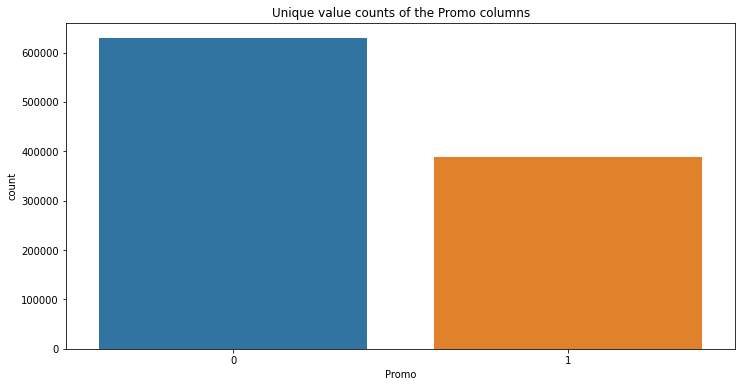

In [178]:
eda_train = EDA(train_store)
eda_train.plot_counts('Promo', type="univariate")

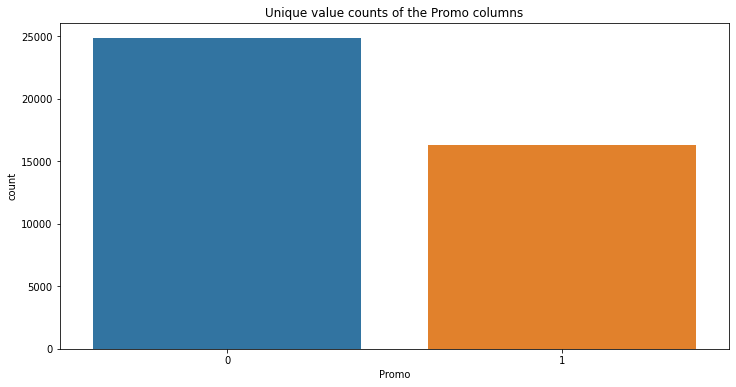

In [179]:
eda_test = EDA(test_store)
eda_test.plot_counts('Promo', type="univariate")

array([[<AxesSubplot:title={'center':'Store'}>,
        <AxesSubplot:title={'center':'DayOfWeek'}>,
        <AxesSubplot:title={'center':'Sales'}>,
        <AxesSubplot:title={'center':'Customers'}>],
       [<AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'Promo'}>,
        <AxesSubplot:title={'center':'SchoolHoliday'}>,
        <AxesSubplot:title={'center':'CompetitionDistance'}>],
       [<AxesSubplot:title={'center':'CompetitionOpenSinceMonth'}>,
        <AxesSubplot:title={'center':'CompetitionOpenSinceYear'}>,
        <AxesSubplot:title={'center':'Promo2'}>,
        <AxesSubplot:title={'center':'Promo2SinceWeek'}>],
       [<AxesSubplot:title={'center':'Promo2SinceYear'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

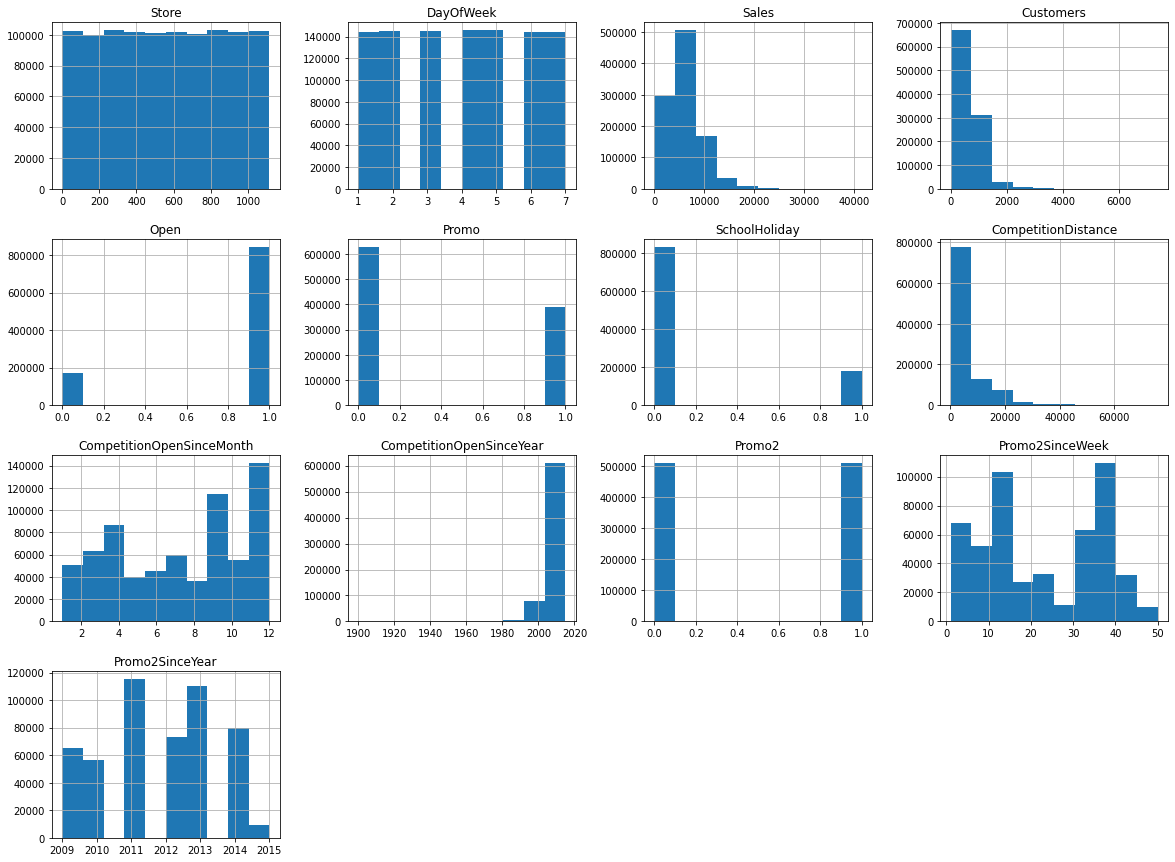

In [180]:
num_feats = list(train_store.select_dtypes(include=['int64', 'float64', 'int32']).columns)
train_store[num_feats].hist(figsize=(20,15))

array([[<AxesSubplot:title={'center':'Id'}>,
        <AxesSubplot:title={'center':'Store'}>,
        <AxesSubplot:title={'center':'DayOfWeek'}>],
       [<AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'Promo'}>,
        <AxesSubplot:title={'center':'SchoolHoliday'}>],
       [<AxesSubplot:title={'center':'CompetitionDistance'}>,
        <AxesSubplot:title={'center':'CompetitionOpenSinceMonth'}>,
        <AxesSubplot:title={'center':'CompetitionOpenSinceYear'}>],
       [<AxesSubplot:title={'center':'Promo2'}>,
        <AxesSubplot:title={'center':'Promo2SinceWeek'}>,
        <AxesSubplot:title={'center':'Promo2SinceYear'}>]], dtype=object)

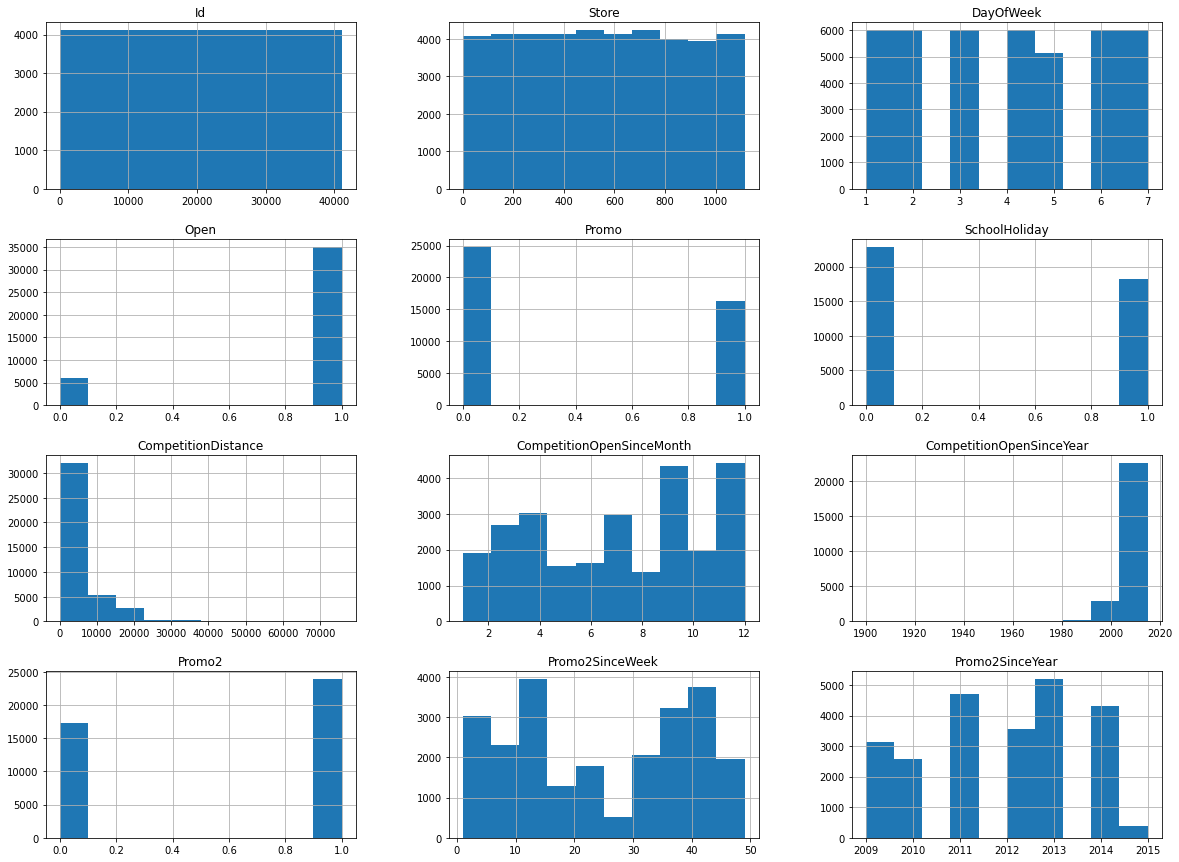

In [181]:
num_feats = list(test_store.select_dtypes(include=['int64', 'float64', 'int32']).columns)
test_store[num_feats].hist(figsize=(20,15))

##### From the plots above, its clear that promotion is distributed equally between the train and test data for most of the features. We however don't get to see the distribution of sales in the test data and therefore cannot be used for prediction, rather for clustering the stores

In [182]:
open_store = train_store[train_store['Open']==1]
open_store.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [183]:
#Creating a new Dataset for sale analysis around holidays
open_store = train_store[train_store['Open']==1]

df = pd.DataFrame()

day = open_store['Date'].dt.strftime('%d')
df['day'] = open_store['Date'].dt.strftime('%d')
df['month'] = open_store['Date'].dt.strftime('%m')
df['sales'] = open_store['Sales']
df['open'] = open_store['Open']
df['date'] = pd.to_datetime(open_store['Date'])


df_indexed =pd.DataFrame(df.set_index('date', inplace=False))
df.head()

,day,month,sales,open,date
0,31,07,5263,1,2015-07-31
1,31,07,6064,1,2015-07-31
2,31,07,8314,1,2015-07-31
3,31,07,13995,1,2015-07-31
4,31,07,4822,1,2015-07-31


In [184]:
df_indexed.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 844392 entries, 2015-07-31 to 2013-01-01
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   day     844392 non-null  object
 1   month   844392 non-null  object
 2   sales   844392 non-null  int64 
 3   open    844392 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 32.2+ MB


In [191]:

christmas_month = 12
easter_month = 4


christmas_month = df_indexed[df_indexed.month == christmas_month]
easter_month = df_indexed[df_indexed.month == easter_month]
christmas_month

around_christmas = christmas_month[(christmas_month['day'] > 20) & (christmas_month['day'] < 30)]
around_christmas = around_christmas[['day', 'sales']].groupby('day').mean()

around_easter = easter_month[(easter_month['day'] > 15) & (easter_month['day'] < 25)]
around_easter = easter_month[['day', 'sales']].groupby('day').mean()

christmas_month
# around_christmas.plot.bar(around_christmas.index, around_christmas['sales'], rot=0)
# plt.bar(around_christmas.index, around_christmas['sales'], 'Sales during month of December: Christmas (Dec 25)')
# plt.bar(around_easter.index, around_easter['sales'], 'Sales during month of April: Easter (April 20)')


,day,month,sales,open
date,,,,


In [186]:
open_store = train_store[(train_store.Open == 1) & (train_store.Year == 2014)]

christmass_month = 12
eastern_month = 4

christmass_month = open_store[open_store.Month == christmass_month]
eastern_month = open_store[open_store.Month == eastern_month]

# plot.bar(chris['Day'], chris['Sales'], 'Sales during month of December: Christmas (Dec 25)')
# plot.bar(eastern['Day'], eastern['Sales'], 'Sales during month of April: Eastern (April 20)')

around_christmas = christmass_month[(christmass_month['Day'] > 20) & (christmass_month['Day'] < 30)]
around_christmas = around_christmas[['Day', 'Sales']].groupby('Day').mean()


around_eastern = eastern_month[(eastern_month['Day'] > 15) & (eastern_month['Day'] < 25)]
around_eastern = around_eastern[['Day', 'Sales']].groupby('Day').mean()

plot.bar(around_christmas.index, around_christmas['Sales'], 'Sales during month of December: Christmas (Dec 25)')
plot.bar(around_eastern.index, around_eastern['Sales'], 'Sales during month of April: Easter (Ap

SyntaxError: EOL while scanning string literal (2101931349.py, line 20)

In [ ]:
christmas_month = 12
easter_month = 4

print(type(easter_month))
christmas_month = df_indexed[pd.to_numeric(df_indexed['month']) == christmas_month]
easter_month = df_indexed[pd.to_numeric(df_indexed['month']) == easter_month]


# around_christmas = christmas_month[(christmas_month['day'] > 20) & (christmas_month['day'] < 30)]
# around_christmas = around_christmas[['day', 'sales']].groupby('day').mean()

# around_easter = easter_month[(easter_month['day'] > 15) & (easter_month['day'] < 25)]
# around_easter = easter_month[['day', 'sales']].groupby('day').mean()

christmas_month

#### Check & compare sales behavior before, during and after holidays


In [ ]:
# plt.figure(figsize=(12, 8))
plt.scatter(around_christmas["date"],around_christmas["sales"])
plt.plot()

#### Find out any seasonality (Christmas, Easter etc) purchase behaviours,

In [ ]:
plots.heatmap(train_store[['Sales', 'Customers']], title='Correlation Between Sales and Customers')

#### Sales and number of customers are highly correlated: Sales increase with increase in number of customers


#### How does promo affect sales? Are the promos attracting more customers? How does it affect already existing customers?